Assignment-1: Statisitical Interpretation and Exploratory Data Analysis


In [2]:
#import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the csv file
whr_df = pd.read_csv('/content/drive/MyDrive/WHR-2024-5CS037.csv')

1. Data Exploration and Understanding:

• Dataset Overview:
1. Load the dataset and display the first 10 rows.
2. Identify the number of rows and columns in the dataset.
3. List all the columns and their data types.

In [ ]:
#Problem1

#Load and print first 10 rows
print("The first 10 rows of dataset:\n", whr_df.head(10))

The first 10 rows of dataset:
   Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3        

In [ ]:
#print nnumber of rows and columns in the datset
num_rows, num_cols = whr_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 143
Number of columns: 9


In [ ]:
#print the data types of each column
print(f"The columns and their data types:\n{whr_df.dtypes}")

The columns and their data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


• Basic Statistics:

1. Calculate the mean, median, and standard deviation for the Score column.
2. Identify the country with the highest and lowest happiness scores.

In [ ]:
#Calculation of mean, median and standard deviation of score column
score_mean = whr_df['score'].mean()
score_median = whr_df['score'].median()
score_std = whr_df['score'].std()

print(f"The mean of Score column is: {score_mean}")
print(f"The median of Score column is: {score_median}")
print(f"The standard deviation of Score column is: {score_std}")

The mean of Score column is: 5.52758041958042
The median of Score column is: 5.785
The standard deviation of Score column is: 1.1707165099442995


In [ ]:
#Find the countries with highest and lowest happiness score
highest_happiness_score = whr_df.loc[whr_df['score'].idxmax()]
lowest_happiness_score = whr_df.loc[whr_df['score'].idxmin()]

print("The country with highest happiness score:")
print(f"Country: {highest_happiness_score['Country name']}, Score: {highest_happiness_score['score']}")

print("\nThe country with lowest score:")
print(f"Country: {lowest_happiness_score['Country name']}, Score: {lowest_happiness_score['score']}")

The country with highest happiness score:
Country: Finland, Score: 7.741

The country with lowest score:
Country: Afghanistan, Score: 1.721


Missing Values:

1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [ ]:
#Check missing values and count the missing values
miss_values = whr_df.isnull().sum()
print(f"The missing values in each column:\n{miss_values[miss_values>0]}")

The missing values in each column:
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


• Filtering and Sorting:

1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [ ]:
#Filter dataset to show countries with score greater than 7.5
greater_score = whr_df[whr_df['score']>7.5]
print(f"The countries with score greater than 7.5 are:\n{greater_score}")

The countries with score greater than 7.5 are:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [ ]:
#sort the filtered dataset in descending order
sort_greater_score = greater_score.sort_values(by='Log GDP per capita', ascending=False)
print(f"Top 10 countires with score>7.5 and sorted by GDP per capita are:\n{sort_greater_score.head(10)}")

Top 10 countires with score>7.5 and sorted by GDP per capita are:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


• Adding New Columns:

1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)

Medium − (4 ≤ Score ≤ 6)

High − (Score > 6)

In [ ]:
#Add new column and categorize countries into three category
def happiness_catagorize(score):
  if score<4:
    return "Low"
  elif 4<=score<=6:
    return "Medium"
  else:
    return "High"

whr_df['Happiness_Category'] = whr_df['score'].apply(happiness_catagorize)
print(f"Dataset with added Happiness Category column is:\n{whr_df.head(10)}\n{whr_df.tail(10)}")

Dataset with added Happiness Category column is:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       

2. Data Visualizations:

• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

• Plot a histogram for the Score column to show its distribution and also interpret.

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

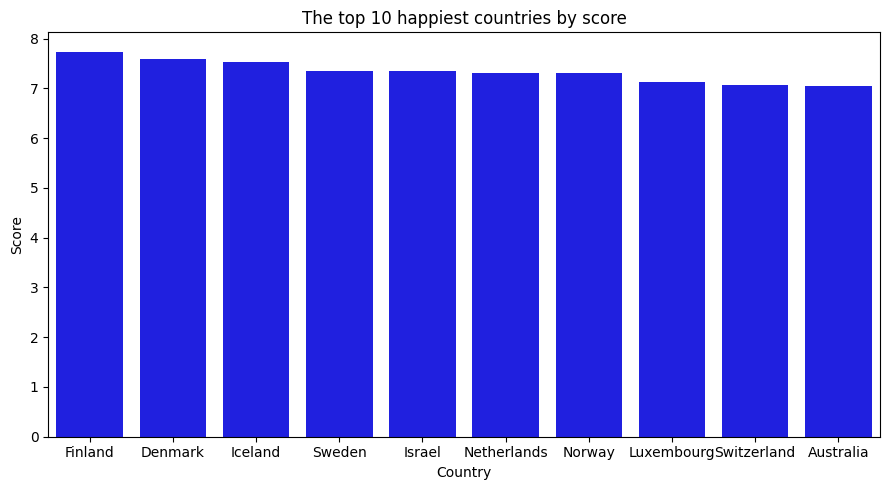

In [ ]:
#Top 10 happiest countryies by score in bar plot
top_10_happiest = whr_df.nlargest(10, 'score')
plt.figure(figsize=(9,5))
sns.barplot(x='Country name', y='score', data=top_10_happiest, color='blue')
plt.title("The top 10 happiest countries by score")
plt.xlabel('Country')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

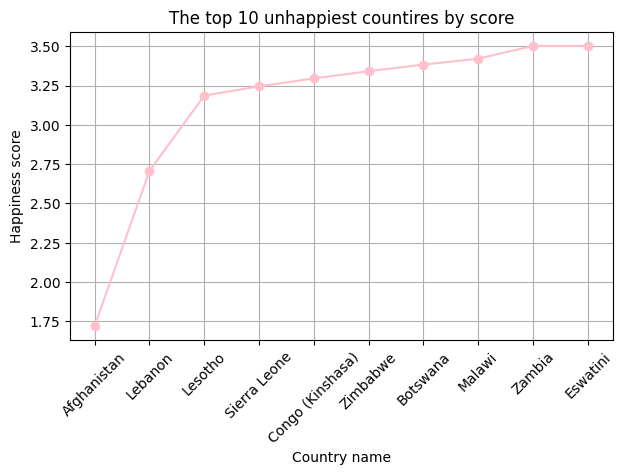

In [ ]:
#Top 10 unhappiest countries by score in line chart
top_10_unhappiest = whr_df.nsmallest(10, 'score')
plt.figure(figsize=(7, 4))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', linestyle='-', color='pink')
plt.title("The top 10 unhappiest countires by score")
plt.xlabel("Country name")
plt.ylabel("Happiness score")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


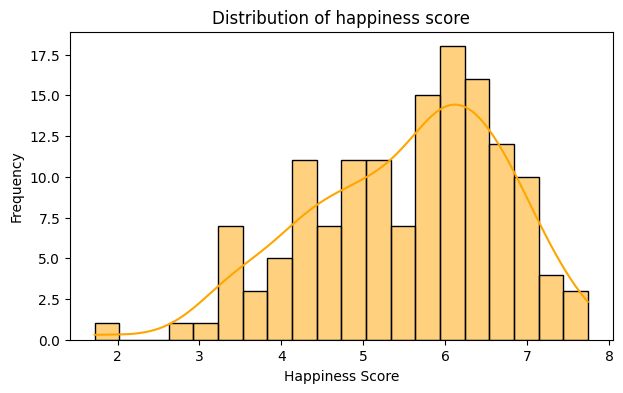

In [ ]:
#Histogram to show distribution os score
plt.figure(figsize=(7, 4))
sns.histplot(whr_df['score'], bins=20, kde=True, color='orange')
plt.title("Distribution of happiness score")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()

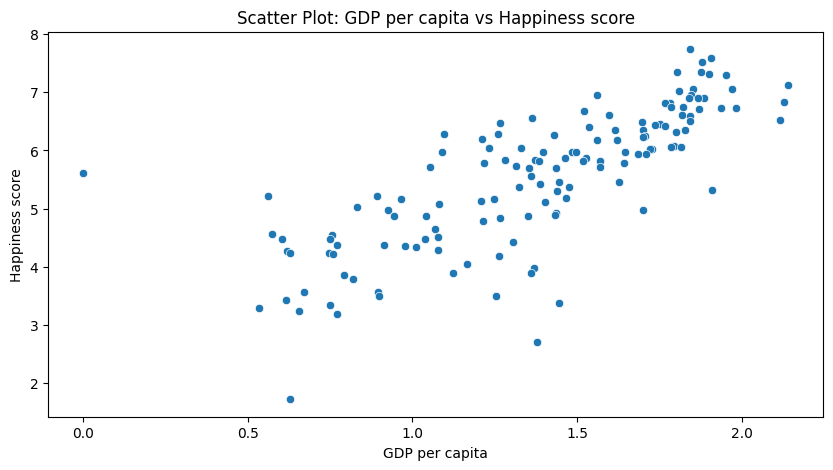

In [ ]:
#Scatter plot between GDP per capita and Score
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Log GDP per capita', y='score', data=whr_df)
plt.title("Scatter Plot: GDP per capita vs Happiness score")
plt.xlabel("GDP per capita")
plt.ylabel("Happiness score")
plt.show()

Task - 1 - Setup Task - Preparing the South-Asia Dataset:

Steps:

1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

3. Save the filtered dataframe as separate CSV files for future use.

In [4]:
#Problem2
#create a new datset and store as a csv file

#Step1:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

#Step2:
south_asian_df = whr_df[whr_df['Country name'].isin(south_asian_countries)]
print(f"The filtered dataset of south asian countires:\n{south_asian_df}")

#Step3:
filtered_file = 'south_asian_countries.csv'
south_asian_df.to_csv(filtered_file, index=False)
print(f"\nThe filtered dataset is saved to '{filtered_file}'.")

The filtered dataset of south asian countires:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.

Task - 2 - Composite Score Ranking:
Tasks:

1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy

2. Rank the South Asian countries based on the Composite Score in descending order.

3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.

In [5]:
#load the datset and add a new column to calculate Composite score
south_asian_df = pd.read_csv('/content/south_asian_countries.csv')

south_asian_df['Composite Score'] = (0.40* south_asian_df['Log GDP per capita'] + 0.30* south_asian_df['Social support']+ 0.30* south_asian_df['Healthy life expectancy'])
print(f"The composite score of south asian countries:\n{south_asian_df[['Country name', 'Composite Score']]}")

The composite score of south asian countries:
  Country name  Composite Score
0        Nepal           0.8159
1     Pakistan           0.7039
2        India           0.7874
3    Sri Lanka           1.0739
4   Bangladesh           0.6774
5  Afghanistan           0.3238


In [7]:
#Ranking south asian countries in descending order based on composite score
sac_descending = south_asian_df.sort_values(by='Composite Score', ascending=False)
print(f"The south asain countries based on Composite Score in descending order is:\n{sac_descending[['Country name', 'Composite Score']]}")


The south asain countries based on Composite Score in descending order is:
  Country name  Composite Score
3    Sri Lanka           1.0739
0        Nepal           0.8159
2        India           0.7874
1     Pakistan           0.7039
4   Bangladesh           0.6774
5  Afghanistan           0.3238


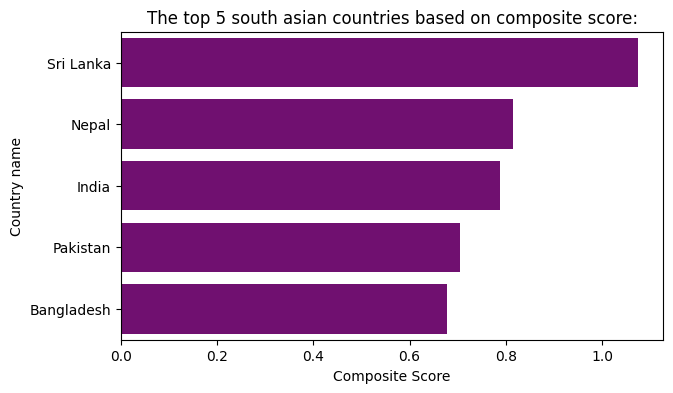

In [ ]:
#Showcase a bar plot that shows top 5 countries
top_5_high_composite = sac_descending.head(5)
plt.figure(figsize=(7,4))
sns.barplot(x='Composite Score', y='Country name', data=top_5_high_composite, color='purple')
plt.title("The top 5 south asian countries based on composite score:")
plt.xlabel("Composite Score")
plt.ylabel("Country name")
plt.show()


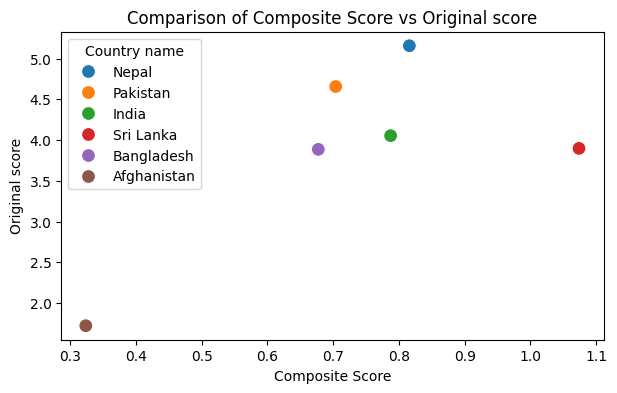

In [ ]:
#Scatter plot showing relation between Composite score and original score
plt.figure(figsize=(7,4))
sns.scatterplot(x='Composite Score', y='score', data=south_asian_df, hue='Country name', palette='tab10', s=100)
plt.title("Comparison of Composite Score vs Original score")
plt.xlabel("Composite Score")
plt.ylabel("Original score")
plt.show()

Task - 3 - Outlier Detection:
Tasks:

1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

2. Define outliers using the 1.5 × IQR rule.

3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

4. Discuss the characteristics of these outliers and their potential impact on regional averages.

In [ ]:
#Calculate outliers of south asian countries datset using IQR
Q1_gdp, Q3_gdp = south_asian_df['Log GDP per capita'].quantile([0.25, 0.75])
IQR_gdp = Q3_gdp - Q1_gdp
lower_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_gdp = Q3_gdp + 1.5 * IQR_gdp
Q1_score, Q3_score = south_asian_df['score'].quantile([0.25, 0.75])
IQR_score = Q3_score - Q1_score
lower_score = Q1_score - 1.5 * IQR_score
upper_score = Q3_score + 1.5 * IQR_score
Outliers = south_asian_df[(south_asian_df['Log GDP per capita']<lower_gdp) | (south_asian_df['Log GDP per capita']>upper_gdp) | (south_asian_df['score']<lower_score) | (south_asian_df['score']>upper_score)]
print(f"The outliers in south asian countries:\n{Outliers}")

The outliers in south asian countries:
  Country name  score  Log GDP per capita  Social support  \
5  Afghanistan  1.721               0.628             0.0   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
5                    0.242                           0.0       0.091   

   Perceptions of corruption  Dystopia + residual  Composite Score  
5                      0.088                0.672           0.3238  


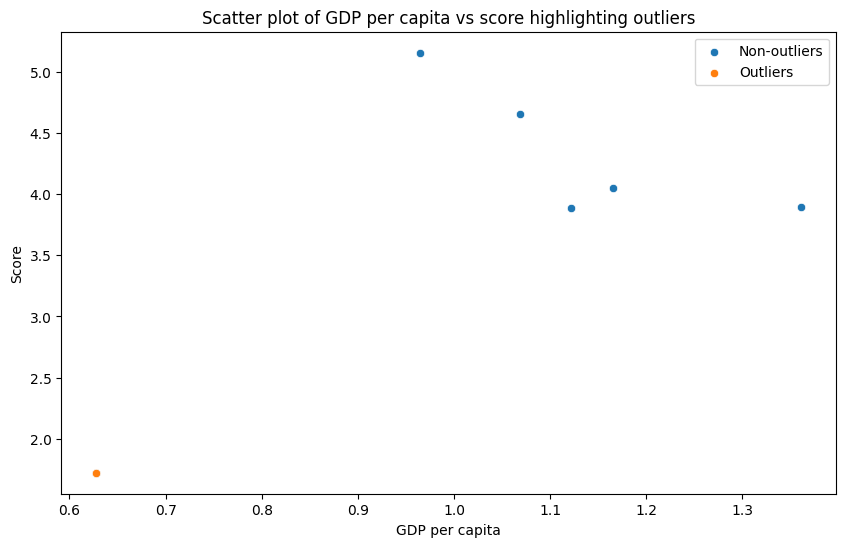

In [ ]:
#Plot a scatter plot with GDP per capita and score highlighting outliers
plt.figure(figsize=(10,6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asian_df, label='Non-outliers')
sns.scatterplot(x='Log GDP per capita', y='score', data=Outliers, label='Outliers')
plt.title("Scatter plot of GDP per capita vs score highlighting outliers")
plt.xlabel("GDP per capita")
plt.ylabel("Score")
plt.legend()
plt.show()


Task - 4 - Exploring Trends Across Metrics:
Tasks:

1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

2. Create scatter plots with trendlines for these metrics against the Score.

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

In [ ]:
#Calculate correlation between given two metrics
correlation1 = south_asian_df['Freedom to make life choices'].corr(south_asian_df['score'])
print(f"Correlation between Freedom to make life choices and score is: {correlation1:.2f}")

correlation2 = south_asian_df['Generosity'].corr(south_asian_df['score'])
print(f"Correlation between Generosity and score is: {correlation2:.2f}")

Correlation between Freedom to make life choices and score is: 0.80
Correlation between Generosity and score is: 0.88


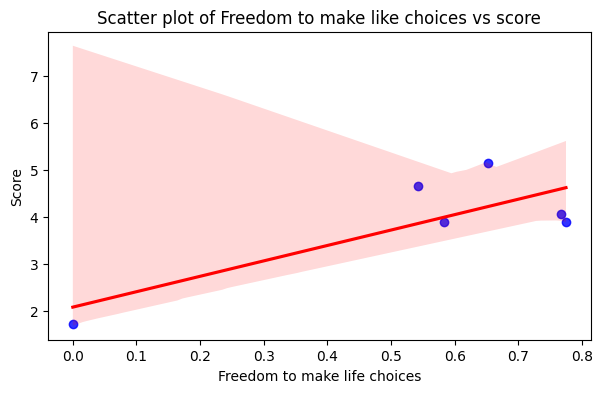

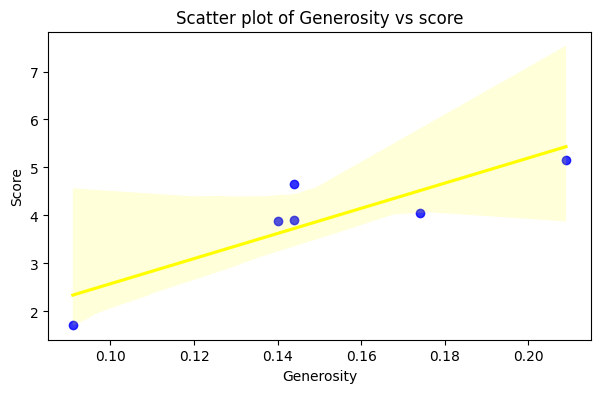

In [ ]:
#Plot a scatter plot showing relation between metices and score
plt.figure(figsize=(7,4))
sns.regplot(data=south_asian_df, x='Freedom to make life choices', y='score', color='blue', line_kws={'color':'red'})
plt.title("Scatter plot of Freedom to make like choices vs score")
plt.xlabel("Freedom to make life choices")
plt.ylabel("Score")
plt.show()

plt.figure(figsize=(7,4))
sns.regplot(data=south_asian_df, x='Generosity', y='score', color='blue', line_kws={'color':'yellow'})
plt.title("Scatter plot of Generosity vs score")
plt.xlabel("Generosity")
plt.ylabel("Score")
plt.show()

Task - 5 - Gap Analysis:
Tasks:

1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.

2. Rank the South Asian countries by this gap in both ascending and descending order.

3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

4. Analyze the reasons behind these gaps and their implications for South Asian countries.

In [ ]:
#Calculate GDP-Score adding a new column
south_asian_df['GDP_Score_Gap'] = south_asian_df['Log GDP per capita']-south_asian_df['score']
print(f"The difference between GDP per capita and score for each south asian country is:\n{south_asian_df[['Country name', 'Log GDP per capita', 'score', 'GDP_Score_Gap']]}")

The difference between GDP per capita and score for each south asian country is:
  Country name  Log GDP per capita  score  GDP_Score_Gap
0        Nepal               0.965  5.158         -4.193
1     Pakistan               1.069  4.657         -3.588
2        India               1.166  4.054         -2.888
3    Sri Lanka               1.361  3.898         -2.537
4   Bangladesh               1.122  3.886         -2.764
5  Afghanistan               0.628  1.721         -1.093


In [ ]:
#Print the rank of south asian countries by the gap in both ascending and descending order
Gap_ascending = south_asian_df.sort_values(by='GDP_Score_Gap', ascending=True)
Gap_descending = south_asian_df.sort_values(by='GDP_Score_Gap', ascending=False)

print(f"The South asian countries in ascending order by GDP_Score_Gap:\n{Gap_ascending[['Country name', 'GDP_Score_Gap']]}")
print(f"\nThe South asian countries in descending order by GDP_Score_Gap:\n{Gap_descending[['Country name', 'GDP_Score_Gap']]}")

The South asian countries in ascending order by GDP_Score_Gap:
  Country name  GDP_Score_Gap
0        Nepal         -4.193
1     Pakistan         -3.588
2        India         -2.888
4   Bangladesh         -2.764
3    Sri Lanka         -2.537
5  Afghanistan         -1.093

The South asian countries in descending order by GDP_Score_Gap:
  Country name  GDP_Score_Gap
5  Afghanistan         -1.093
3    Sri Lanka         -2.537
4   Bangladesh         -2.764
2        India         -2.888
1     Pakistan         -3.588
0        Nepal         -4.193


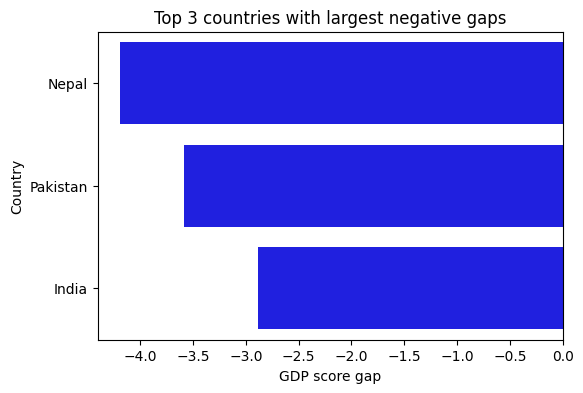

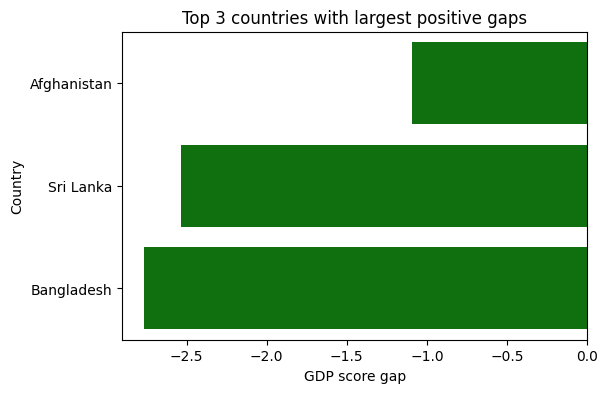

In [ ]:
#Plot a bar chart showing top 3 countries with largest positive and negative gaps
top3_negative = Gap_ascending.head(3)
top3_positive = Gap_descending.head(3)

plt.figure(figsize=(6,4))
sns.barplot(x='GDP_Score_Gap', y='Country name', data=top3_negative, color='blue')
plt.title("Top 3 countries with largest negative gaps")
plt.xlabel("GDP score gap")
plt.ylabel("Country")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='GDP_Score_Gap', y='Country name', data=top3_positive, color='green')
plt.title("Top 3 countries with largest positive gaps")
plt.xlabel("GDP score gap")
plt.ylabel("Country")
plt.show()

Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:

1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

In [10]:
#Problem3
#Create a new datset of Middle eastern countries
middle_eastern_countries =["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_eastern_df = whr_df[whr_df['Country name'].isin(middle_eastern_countries)]
print(f"The filtered dataset of middle eastern countires:\n{middle_eastern_df}")


The filtered dataset of middle eastern countires:
             Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12       

1. Descriptive Statistics:

• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

• Which region has higher happiness Scores on average?

In [ ]:
#Mean and standard deviation of both region is calculated
sac_score_mean = south_asian_df['score'].mean()
sac_score_std = south_asian_df['score'].std()

print(f"The mean of Score column of south asian countries is: {sac_score_mean}")
print(f"The standard deviation of Score column of south asian countries is: {sac_score_std}")

mec_score_mean = middle_eastern_df['score'].mean()
mec_score_std = middle_eastern_df['score'].std()

print(f"\nThe mean of Score column of middle eastern countries is: {mec_score_mean}")
print(f"The standard deviation of Score column of middle eastern countries is: {mec_score_std}")

The mean of Score column of south asian countries is: 3.8952000000000004
The standard deviation of Score column of south asian countries is: 1.3160025455902433

The mean of Score column of middle eastern countries is: 5.412100000000001
The standard deviation of Score column of middle eastern countries is: 1.5662011684327144


In [ ]:
#Find the region with higher happiness score
higher_mean = "South Asia" if sac_score_mean>mec_score_mean else "Middle East"
print(f"The region with higher happiness score on average is: {higher_mean}")

The region with higher happiness score on average is: Middle East


2. Top and Bottom Performers:

• Identify the top 3 and bottom 3 countries in each region based on the score.

• Plot bar charts comparing these charts.

In [ ]:
#Print top 3 and bottom 3 countries of both regions
top3_sac = south_asian_df.sort_values(by='score', ascending=False).head(3)
bottom3_sac = south_asian_df.sort_values(by='score').head(3)
print(f"The top 3 south asian countires based on score are:\n{top3_sac[['Country name', 'score']]}")
print(f"\nThe bottom 3 south asian countires based on score are:\n{bottom3_sac[['Country name', 'score']]}")

top3_mec = middle_eastern_df.sort_values(by='score', ascending=False).head(3)
bottom3_mec = middle_eastern_df.sort_values(by='score').head(3)
print(f"\nThe top 3 middle eastern countires based on score are:\n{top3_mec[['Country name', 'score']]}")
print(f"\nThe bottom 3 middle eastern countires based on score are:\n{bottom3_mec[['Country name', 'score']]}")

The top 3 south asian countires based on score are:
  Country name  score
0        Nepal  5.158
1     Pakistan  4.657
2        India  4.054

The bottom 3 south asian countires based on score are:
  Country name  score
5  Afghanistan  1.721
4   Bangladesh  3.886
3    Sri Lanka  3.898

The top 3 middle eastern countires based on score are:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

The bottom 3 middle eastern countires based on score are:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


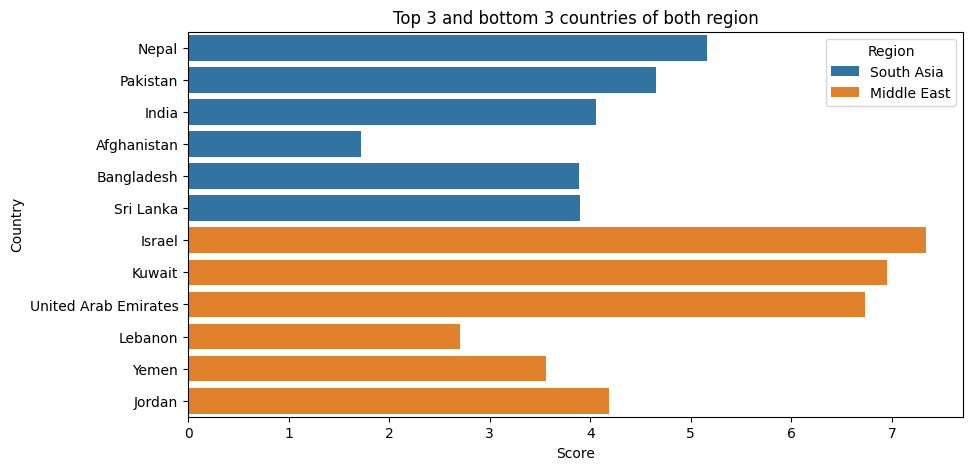

In [ ]:
#Create a bar plot comparing top 3 and bottom 3 countries
top_bottom = pd.concat([top3_sac.assign(Region = 'South Asia'), bottom3_sac.assign(Region = 'South Asia'), top3_mec.assign(Region = 'Middle East'), bottom3_mec.assign(Region = 'Middle East')])
plt.figure(figsize=(10,5))
sns.barplot(x='score', y='Country name', data=top_bottom, hue='Region')
plt.title('Top 3 and bottom 3 countries of both region')
plt.xlabel('Score')
plt.ylabel('Country')
plt.show()

3. Metric Comparisons:

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.

• Which metrics show the largest disparity between the two regions?

<Figure size 600x400 with 0 Axes>

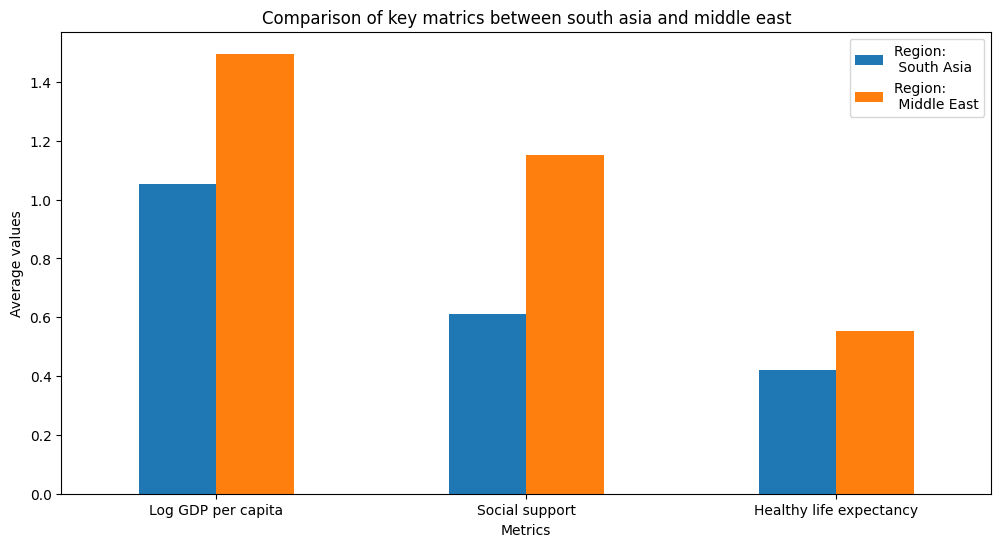

In [13]:
#Bar grap comparing key metrices of both regions
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

sac_means = south_asian_df[metrics].mean()
mec_means = middle_eastern_df[metrics].mean()
comparison_df = pd.DataFrame({'Region: \n South Asia': sac_means, 'Region: \n Middle East': mec_means}).reset_index().rename(columns ={'index': 'Metric'})

plt.figure(figsize=(6, 4))
comparison_df.plot(kind='bar', x='Metric', figsize=(12, 6))
plt.xlabel('Metrics')
plt.ylabel('Average values')
plt.title("Comparison of key matrics between south asia and middle east")
plt.xticks(rotation=0)
plt.legend()
plt.show()

In [ ]:
#Find the region with largest disparity
disparity = abs(sac_means - mec_means)
largest_disparity = disparity.idxmax()
print(f"The metric that shows largest disparity is: {largest_disparity}")

The metric that shows largest disparity is: Social support


4. Happiness Disparity:

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

• Which region has greater variability in happiness?

In [16]:
#Calculate range and coefficient of variation of both regions
sac_range = south_asian_df['score'].max()-south_asian_df['score'].min()
mec_range = middle_eastern_df['score'].max()-middle_eastern_df['score'].min()

sac_cv = south_asian_df['score'].std() / south_asian_df['score'].mean()
mec_cv = middle_eastern_df['score'].std() / middle_eastern_df['score'].mean()

print(f"South Asia:\nRange:{sac_range:.2f}, CV:{sac_cv:.2f}")
print(f"Middle East:\nRange:{mec_range:.2f}, CV:{mec_cv:.2f}")

South Asia:
Range:3.44, CV:0.30
Middle East:
Range:4.63, CV:0.29


In [17]:
#Find the region with greater variablity
if sac_cv>mec_cv:
  print("South Asia has greater variablity based on CV.")
else:
  print("Middle East has greater variability based on CV.")

South Asia has greater variablity based on CV.


5. Correlation Analysis:

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.

• Create scatter plots to visualize and interpret the relationships.

In [ ]:
#Find correlation of score with given metrices of both regions
sac_freedom_corr = south_asian_df['Freedom to make life choices'].corr(south_asian_df['score'])
mec_freedom_corr = middle_eastern_df['Freedom to make life choices'].corr(middle_eastern_df['score'])

sac_gen_corr = south_asian_df['Generosity'].corr(south_asian_df['score'])
mec_gen_corr = middle_eastern_df['Generosity'].corr(middle_eastern_df['score'])

print(f"South Asia:\nFreedom Correlation: {sac_freedom_corr:.2f}, Generosity Correlation: {sac_gen_corr:.2f}")
print(f"Middle East:\nFreedom Correlation: {mec_freedom_corr:.2f}, Generosity Correlation: {mec_gen_corr:.2f}")

South Asia:
Freedom Correlation: 0.80, Generosity Correlation: 0.87
Middle East:
Freedom Correlation: 0.86, Generosity Correlation: 0.63


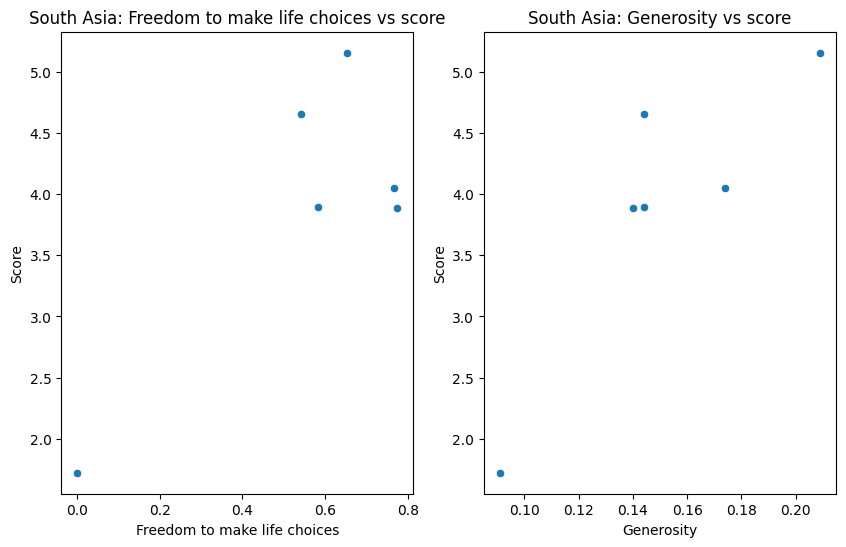

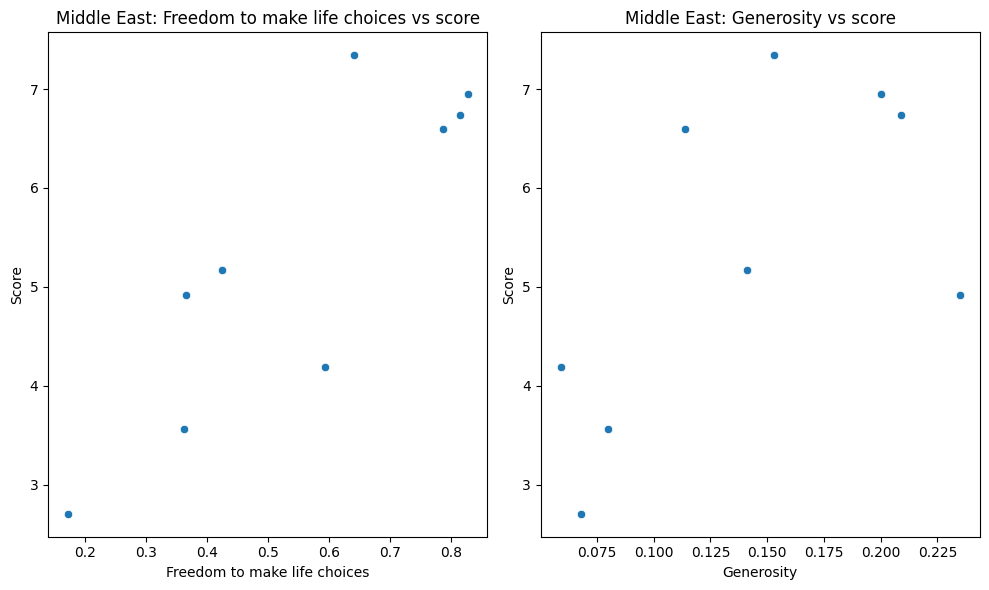

In [18]:
#Plot scatter plots visualizing the above relation
#For South Asia
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Freedom to make life choices', y='score', data=south_asian_df)
plt.title('South Asia: Freedom to make life choices vs score')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Generosity', y='score', data=south_asian_df)
plt.title('South Asia: Generosity vs score')
plt.xlabel('Generosity')
plt.ylabel('Score')

#For Middle East
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Freedom to make life choices', y='score', data=middle_eastern_df)
plt.title('Middle East: Freedom to make life choices vs score')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Generosity', y='score', data=middle_eastern_df)
plt.title('Middle East: Generosity vs score')
plt.xlabel('Generosity')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

6. Outlier Detection:

• Identify outlier countries in both regions based on Score and GDP per Capita.
# New Section
• Plot these outliers and discuss their implications.

In [ ]:
#Find outlier countries of both regions
def outlier_countries(df, column):
  q1, q3 = df[column].quantile([0.25, 0.75])
  iqr = q3-q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  return df[(df[column]<lower_bound) | (df[column]>upper_bound)]

sac_outlier = outlier_countries(south_asian_df, 'score')
mec_outlier = outlier_countries(middle_eastern_df, 'score')

print(f"The outlier countries in South Asia:\n{sac_outlier}")
print(f"\nThe outlier countries in Middle East:\n{mec_outlier}")

The outlier countries in South Asia:
  Country name  score  Log GDP per capita  Social support  \
5  Afghanistan  1.721               0.628             0.0   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
5                    0.242                           0.0       0.091   

   Perceptions of corruption  Dystopia + residual  Composite Score  \
5                      0.088                0.672           0.3238   

   GDP_Score_Gap  
5         -1.093  

The outlier countries in Middle East:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Dystopia + residual]
Index: []


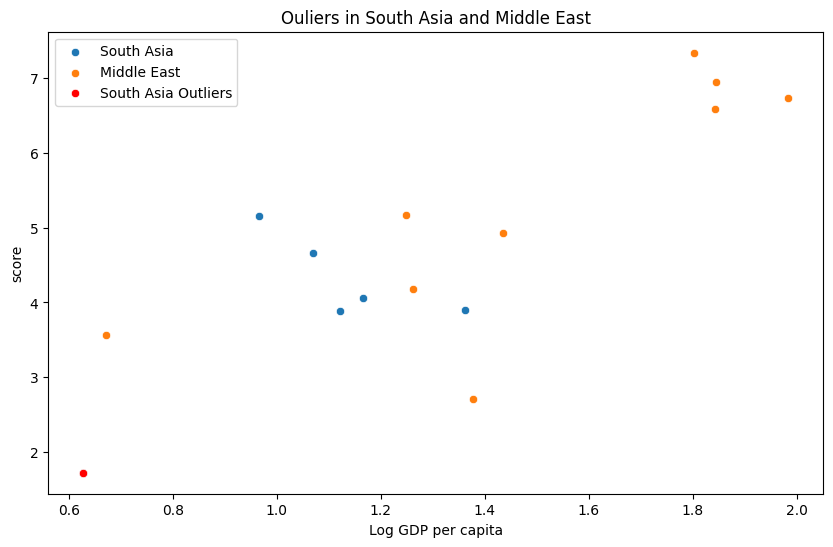

In [ ]:
#Showcase the outlier countires in a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asian_df, label='South Asia')
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_eastern_df, label='Middle East')
sns.scatterplot(x='Log GDP per capita', y='score', data=sac_outlier, color='red', label='South Asia Outliers')
sns.scatterplot(x='Log GDP per capita', y='score', data=mec_outlier, color='red', label='Middle East Outliers')
plt.title('Ouliers in South Asia and Middle East')
plt.legend()
plt.show()

7. Visualization:

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

• Interpret the key differences in distribution shapes, medians, and outliers.

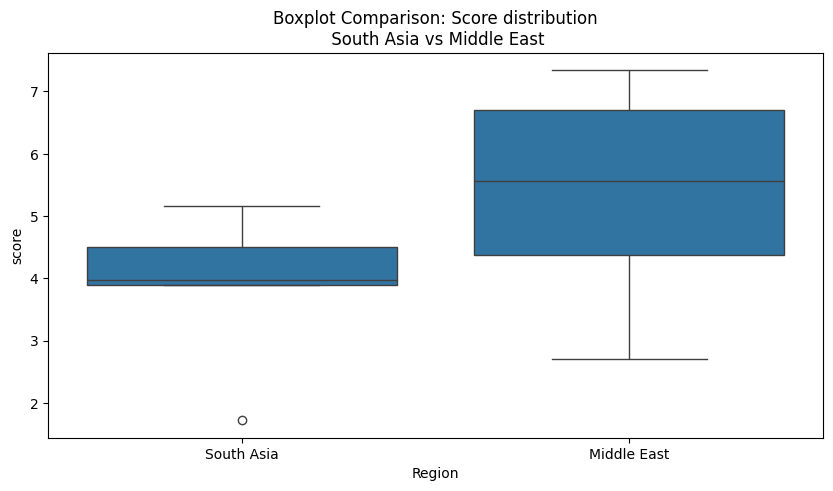

In [ ]:
#Plot boxplots comapring the distribution os score between two regions
plt.figure(figsize=(10,5))
sns.boxplot(x='Region', y='score', data=pd.concat([south_asian_df.assign(Region='South Asia'), middle_eastern_df.assign(Region='Middle East')]))
plt.title("Boxplot Comparison: Score distribution\n South Asia vs Middle East")
plt.show()

The above boxplots shows a huge difference in happiness score between two regions.
The box of South Asia is much smaller and narrower compared to Midlle East which indicates that the happiness score of countries of South Asia is much lower than the countries form Middle East
The horizontal line inside the box indicates median of each regions. The line of South Asia is very low compared to Middle East suggesting the low happiness score.
Similarly, there is one outlier in South Asia indicating there is a presence of a outlier country in South Asia.